In [1]:
import pandas as pd
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math

In [2]:
path = str(Path(os.path.abspath(os.getcwd())).parent.absolute())

casesDeathsPath = path + '/data_analysis/tot_amount_cases_deaths.tsv'
seasonQueryPath = path + '/data_analysis/cases_each_season.tsv'
instFundingsPath = path + '/data_analysis/tot_funds_inst_country.tsv'
vaccRegionsPath = path + '/data_analysis/vaccination_per_region.tsv'

In [3]:
casesDeaths = pd.read_csv(casesDeathsPath, sep='\t', index_col='country_name')
seasonQuery = pd.read_csv(seasonQueryPath, sep='\t', index_col='country')
instFundings = pd.read_csv(instFundingsPath, sep='\t')
vaccRegions = pd.read_csv(vaccRegionsPath, sep='\t', index_col='regionName')

In [4]:
casesDeaths.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, Andorra to Namibia
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c_tot   229 non-null    int64
 1   d_tot   229 non-null    int64
dtypes: int64(2)
memory usage: 5.4+ KB


In [5]:
seasonQuery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, Andorra to Namibia
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   2020_spring_amount  229 non-null    int64
 1   2020_summer_amount  229 non-null    int64
 2   2020_fall_amount    229 non-null    int64
 3   2021_winter_amount  229 non-null    int64
 4   2021_spring_amount  229 non-null    int64
 5   2021_summer_amount  229 non-null    int64
 6   2021_fall_amount    229 non-null    int64
dtypes: int64(7)
memory usage: 14.3+ KB


In [6]:
vaccRegions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Regional Office for Europe to Regional Office for South-East Asia
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   totalVaccinated  6 non-null      float64
 1   total1stDose     6 non-null      float64
dtypes: float64(2)
memory usage: 144.0+ bytes


In [7]:
# Percentage of country on the total number of cases and deaths

labels = ['China', 'India', 'USA', 'Indonesia', 'Pakistan', 'Italy', 'Others']
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (40,40))
plt.rcParams['font.size'] = '20'

# Plot pie chart of cases
total_amounts_cases = casesDeaths.sum()
china_cases = casesDeaths.at['China', 'c_tot']
india_cases = casesDeaths.at['India', 'c_tot']
usa_cases = casesDeaths.at['United States', 'c_tot']
indon_cases = casesDeaths.at['Indonesia', 'c_tot']
pakist_cases = casesDeaths.at['Pakistan', 'c_tot']
italy_cases = casesDeaths.at['Italy', 'c_tot']
others_cases = total_amounts_cases['c_tot'] - (china_cases + india_cases + usa_cases + indon_cases + pakist_cases + italy_cases)

values_cases = [china_cases, india_cases, usa_cases, indon_cases, pakist_cases, italy_cases, others_cases]

ax1.pie(values_cases, labels=labels, shadow=True, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')


# Plot pie chart of deaths
total_amounts_deaths = casesDeaths.sum()
china_deaths = casesDeaths.at['China', 'd_tot']
india_deaths = casesDeaths.at['India', 'd_tot']
usa_deaths = casesDeaths.at['United States', 'd_tot']
indon_deaths = casesDeaths.at['Indonesia', 'd_tot']
pakist_deaths = casesDeaths.at['Pakistan', 'd_tot']
italy_deaths = casesDeaths.at['Italy', 'd_tot']
others_deaths = total_amounts_deaths['d_tot'] - (china_deaths + india_deaths + usa_deaths + indon_deaths + pakist_deaths + italy_deaths)

values_deaths = [china_deaths, india_deaths, usa_deaths, indon_deaths, pakist_deaths, italy_deaths, others_deaths]

ax2.pie(values_deaths, labels=labels, shadow=True, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')


plt.show()

Text(0.5, 1.0, 'Summer 2021')

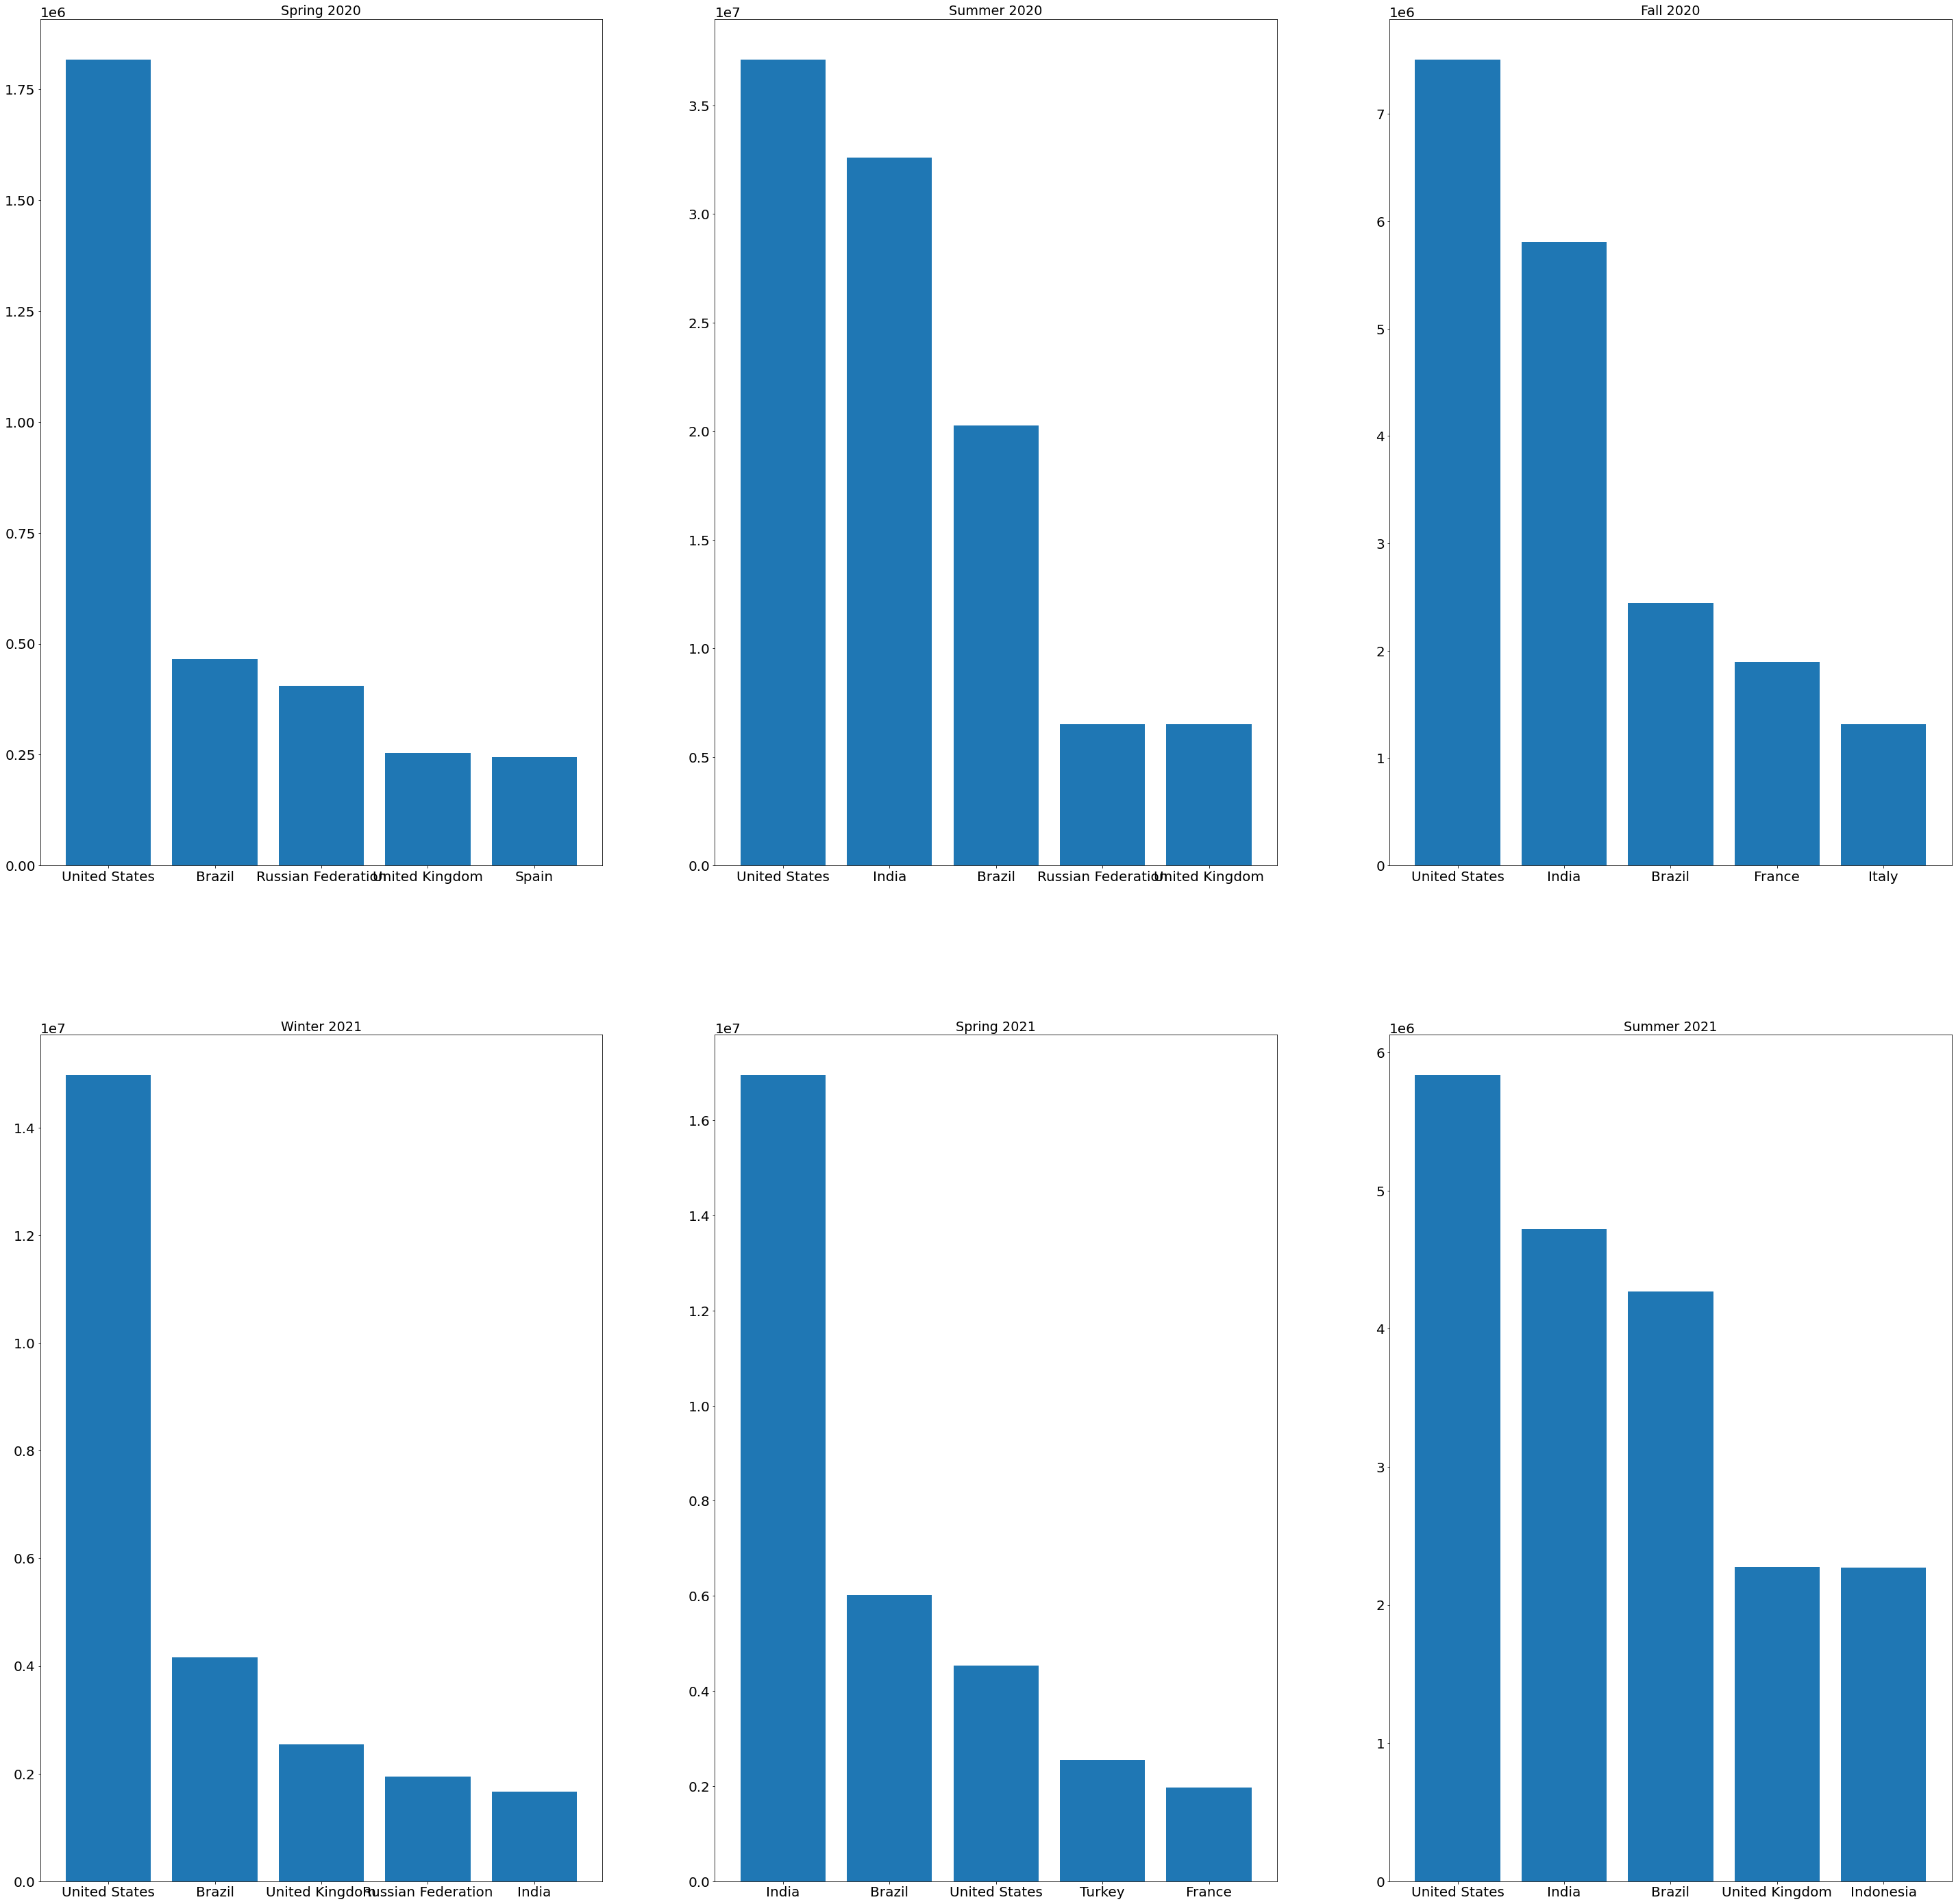

In [8]:
# amount of cases of the higher five countries per each season

fig1, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(50,50))
plt.rcParams['font.size'] = '16'

seasonQuery.sort_values(by='2020_spring_amount', ascending=False, inplace=True)
labels1 = seasonQuery[:5].index
ax1.bar(labels1, seasonQuery[:5]['2020_spring_amount'])
ax1.set_title('Spring 2020')


seasonQuery.sort_values(by='2020_summer_amount', ascending=False, inplace=True)
labels2 = seasonQuery[:5].index
ax2.bar(labels2, seasonQuery[:5]['2020_summer_amount'])
ax2.set_title('Summer 2020')


seasonQuery.sort_values(by='2020_fall_amount', ascending=False, inplace=True)
labels3 = seasonQuery[:5].index
ax3.bar(labels3, seasonQuery[:5]['2020_fall_amount'])
ax3.set_title('Fall 2020')


seasonQuery.sort_values(by='2021_winter_amount', ascending=False, inplace=True)
labels4 = seasonQuery[:5].index
ax4.bar(labels4, seasonQuery[:5]['2021_winter_amount'])
ax4.set_title('Winter 2021')


seasonQuery.sort_values(by='2021_spring_amount', ascending=False, inplace=True)
labels5 = seasonQuery[:5].index
ax5.bar(labels5, seasonQuery[:5]['2021_spring_amount'])
ax5.set_title('Spring 2021')


seasonQuery.sort_values(by='2021_summer_amount', ascending=False, inplace=True)
labels6 = seasonQuery[:5].index
ax6.bar(labels6, seasonQuery[:5]['2021_summer_amount'])
ax6.set_title('Summer 2021')

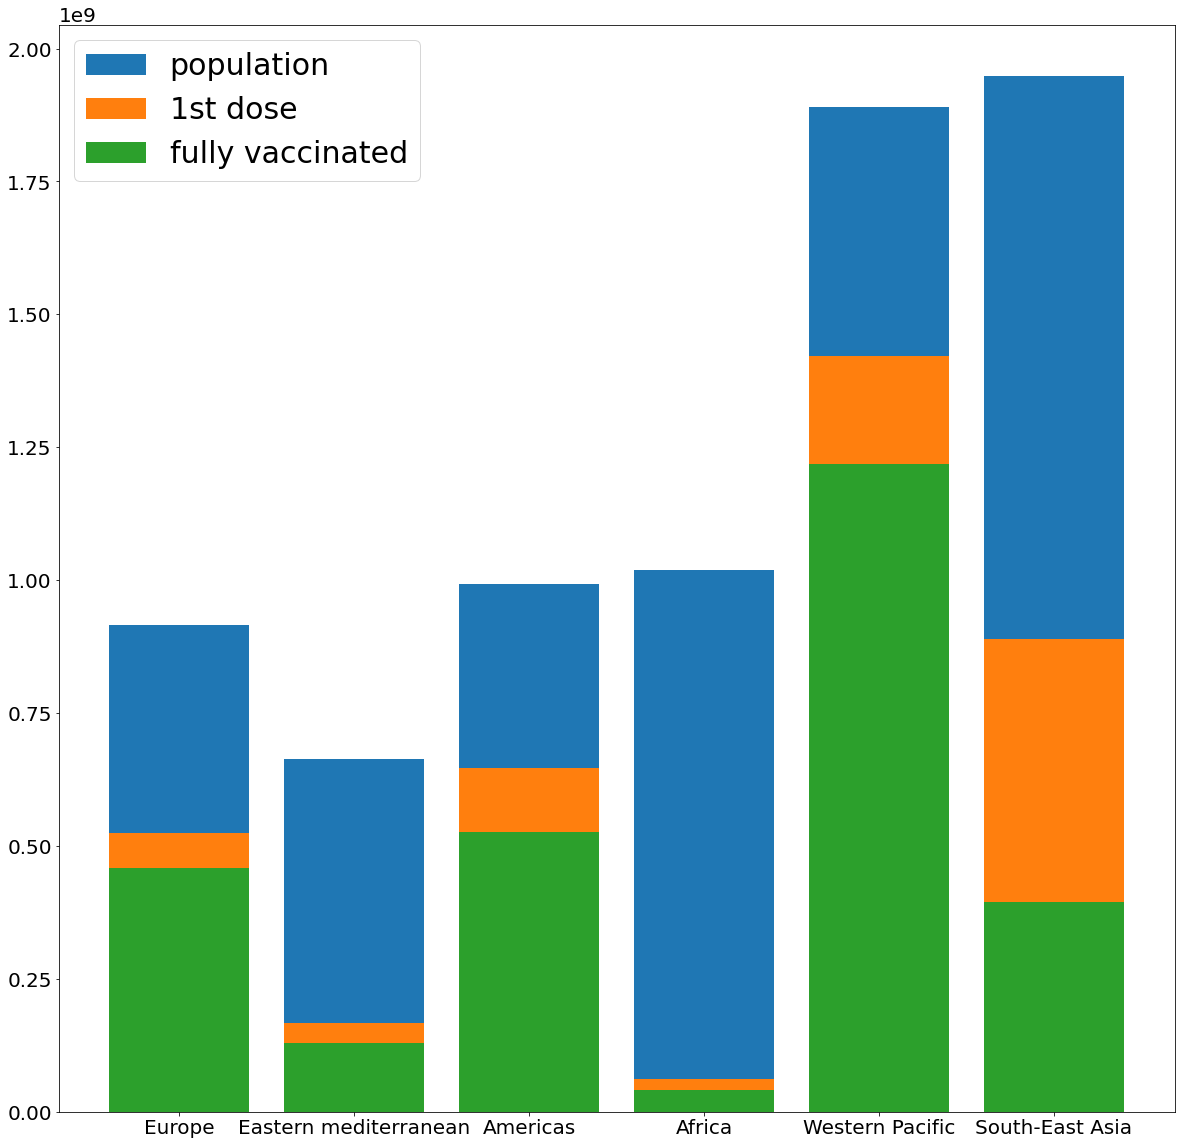

In [16]:
# amount of people per region with fully vaccination and 1st dose vaccination

labels = ['Europe', 'Eastern mediterranean', 'Americas', 'Africa', 'Western Pacific', 'South-East Asia']

first_dose = []
full_vacc = []

#create bar chart
fig, ax = plt.subplots(figsize=(20,20))
plt.rcParams['font.size'] = '20'

for index, val in vaccRegions.iterrows():
    first_dose.append(val[1])
    full_vacc.append(val[0])
population = [916315000, 664336000, 992155000, 1019922000, 1889901000, 1947632000]

ax.bar(labels, population)
ax.bar(labels, first_dose)
ax.bar(labels, full_vacc)

ax.legend(['population', '1st dose', 'fully vaccinated'], fontsize=30)


plt.show()


#create data table
table_labels_col = [' ', 'Europe', 'Eastern mediterranean', 'Americas', 'Africa', 'Western Pacific', 'South-East Asia']
table_labels_row = ['first dose', 'fully vaccinated', 'current first dose', '% fully vaccinated on almost one dose', '% first dose on population']

curr_1st_dose = [math.trunc(first_dose[0]-full_vacc[0]),
                  math.trunc(first_dose[1]-full_vacc[1]),
                  math.trunc(first_dose[2]-full_vacc[2]),
                  math.trunc(first_dose[3]-full_vacc[3]),
                  math.trunc(first_dose[4]-full_vacc[4]),
                  math.trunc(first_dose[5]-full_vacc[5])]

percentage_full_on_first = [math.trunc((full_vacc[0]/first_dose[0])*100),
                  math.trunc((full_vacc[1]/first_dose[1])*100),
                  math.trunc((full_vacc[2]/first_dose[2])*100),
                  math.trunc((full_vacc[3]/first_dose[3])*100),
                  math.trunc((full_vacc[4]/first_dose[4])*100),
                  math.trunc((full_vacc[5]/first_dose[5])*100)]

percentage_first_on_pop = [math.trunc((first_dose[0]/population[0])*100),
                  math.trunc((first_dose[1]/population[1])*100),
                  math.trunc((first_dose[2]/population[2])*100),
                  math.trunc((first_dose[3]/population[3])*100),
                  math.trunc((first_dose[4]/population[4])*100),
                  math.trunc((first_dose[5]/population[5])*100)]


table = go.Figure(data=[go.Table(
    header=dict(values=table_labels_col,
               fill_color='lightskyblue',
               line_color='black'),
    cells=dict(values=[[table_labels_row[0], table_labels_row[1], table_labels_row[2], table_labels_row[3], table_labels_row[4]],
                      [first_dose[0], full_vacc[0], curr_1st_dose[0], percentage_full_on_first[0], percentage_first_on_pop[0]],
                      [first_dose[1], full_vacc[1], curr_1st_dose[1], percentage_full_on_first[1], percentage_first_on_pop[1]],
                      [first_dose[2], full_vacc[2], curr_1st_dose[2], percentage_full_on_first[2], percentage_first_on_pop[2]],
                      [first_dose[3], full_vacc[3], curr_1st_dose[3], percentage_full_on_first[3], percentage_first_on_pop[3]],
                      [first_dose[4], full_vacc[4], curr_1st_dose[4], percentage_full_on_first[4], percentage_first_on_pop[4]],
                      [first_dose[5], full_vacc[5], curr_1st_dose[5], percentage_full_on_first[5], percentage_first_on_pop[5]]],
              align='center',
              height=40,
              fill=dict(color=['lightskyblue', 'white']),
              line_color='black')
)])

table.update_layout(width=1000, height=1000)
table.show()